<a href="https://colab.research.google.com/github/Nanoth-T/Learning-Machine-Learning/blob/main/regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Tuchsanai/DSBA_Skill_ML_FEB2023

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [ ]:
# generate 20 data points
N = 20

#random data on x-axis (-5) - (5)
x= np.random.rand(N)*10-5


# m =0.5, b=-1
y = 0.5*x -1+ np.random.rand(N)

In [ ]:
x

array([ 3.543571  , -2.79500159, -2.35763004, -2.37892981, -3.8048207 ,
        2.11031658, -4.69998526, -2.19269434,  4.89346046, -2.08572825,
        3.19817002, -0.62418554, -1.53309748,  2.03704618, -2.23472869,
       -1.83968277, -0.70566498,  1.8971635 , -2.11959619, -4.86175944])

In [ ]:
y

array([ 1.63631989, -1.69939527, -1.38784458, -1.70603799, -2.68909232,
        0.77188004, -3.02903409, -1.22946485,  2.35192975, -1.55590462,
        1.55981725, -0.58970735, -1.51938212,  0.38898445, -1.79652157,
       -1.38603395, -1.31692226,  0.83474322, -2.00567454, -3.05381852])

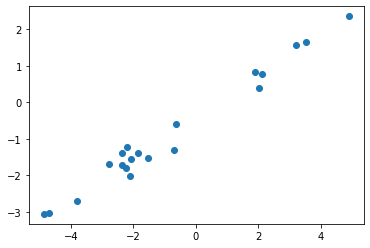

In [ ]:
plt.scatter(x,y)

In [ ]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = x.reshape(N, 1)
Y = y.reshape(N, 1)
print(x.shape, y.shape)

(20,) (20,)


In [ ]:
def Gradient(m,b) :

    grad_m =0; grad_b = 0;

    for i in range(N) :
        grad_m += -X[i]*(Y[i]- (m*X[i]+b))
        grad_b += - (Y[i]- (m*X[i]+b) )

    return grad_m, grad_b

Gradient(-1,-1)

(array([-244.95967521]), array([13.97493674]))

In [ ]:
n_epochs      = 1000
learning_rate = 0.01
theta         = np.random.rand(2,1)

for i in range(n_epochs) :
    grad_m, grad_b = Gradient(theta[0], theta[1])
    theta[0] -= learning_rate*grad_m
    theta[1] -= learning_rate*grad_b


theta

array([[ 0.55873431],
       [-0.4085998 ]])

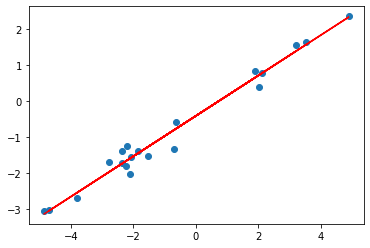

In [ ]:
predict = theta[0]*X + theta[1]
plt.plot(X, predict, 'r')
plt.scatter(x,y)

In [ ]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 0.3187
Epoch 2/30, Loss: 0.0730
Epoch 3/30, Loss: 0.0640
Epoch 4/30, Loss: 0.0624
Epoch 5/30, Loss: 0.0613
Epoch 6/30, Loss: 0.0604
Epoch 7/30, Loss: 0.0596
Epoch 8/30, Loss: 0.0589
Epoch 9/30, Loss: 0.0584
Epoch 10/30, Loss: 0.0580
Epoch 11/30, Loss: 0.0576
Epoch 12/30, Loss: 0.0573
Epoch 13/30, Loss: 0.0571
Epoch 14/30, Loss: 0.0569
Epoch 15/30, Loss: 0.0567
Epoch 16/30, Loss: 0.0566
Epoch 17/30, Loss: 0.0565
Epoch 18/30, Loss: 0.0564
Epoch 19/30, Loss: 0.0563
Epoch 20/30, Loss: 0.0562
Epoch 21/30, Loss: 0.0562
Epoch 22/30, Loss: 0.0561
Epoch 23/30, Loss: 0.0561
Epoch 24/30, Loss: 0.0561
Epoch 25/30, Loss: 0.0560
Epoch 26/30, Loss: 0.0560
Epoch 27/30, Loss: 0.0560
Epoch 28/30, Loss: 0.0560
Epoch 29/30, Loss: 0.0560
Epoch 30/30, Loss: 0.0560


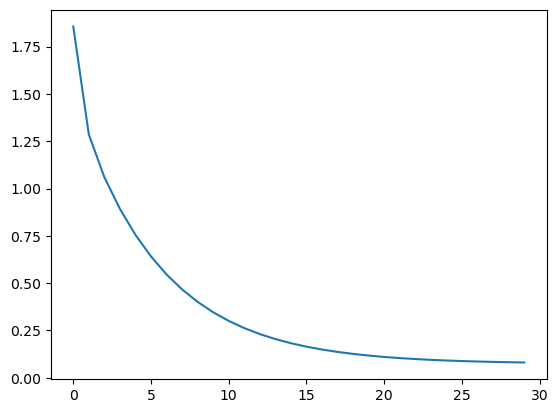

In [ ]:
# Plot the loss per iteration
plt.plot(losses);

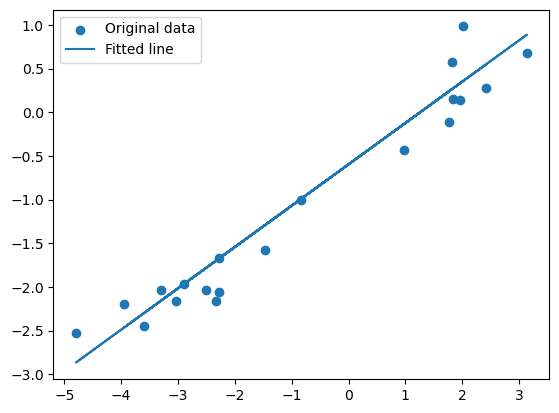

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
m = model.weight.data.numpy()
b = model.bias.data.numpy()
print(m, b)

[[0.47310516]] [-0.5961329]
